## Evaluation of a Classification Model

All the code is available in iNeuron git repo.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Intercept_scalling = Automatic standardization
# Multi class - Apple,Ornage
# Multilable - Same text we can do multilable - Exmple region,state.
# OVR - One vest other
# Learning rate C = 1/lamda

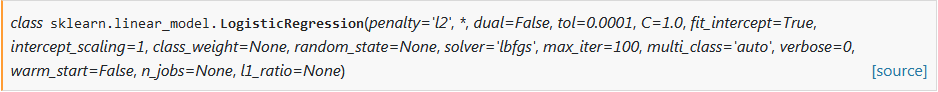

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
import pandas as pd

In [6]:
df=load_breast_cancer()
### Independent features
X=pd.DataFrame(df['data'],columns=df['feature_names'])

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
### Dependent features
y=pd.DataFrame(df['target'],columns=["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [9]:
### Check dataset is balanced or not

y['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [10]:
params=[{'C':[1,5,10,100,150,1000],'max_iter':[10,100,200]}]

In [11]:
model1=LogisticRegression()

In [12]:
model1

LogisticRegression()

In [13]:
model=GridSearchCV(model1,param_grid=params,scoring='f1',cv=5)

In [14]:
import warnings
warnings.filterwarnings('ignore')


In [15]:
### Splitted the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=50)

In [16]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10, 100, 150, 1000],
                          'max_iter': [10, 100, 200]}],
             scoring='f1')

In [17]:
# Here we can see wich one is best
print(model.best_params_)
print(model.best_estimator_)

{'C': 150, 'max_iter': 200}
LogisticRegression(C=150, max_iter=200)


In [18]:
model.score(X_test,y_test)

0.9834254143646408

In [19]:
# Each iteration result
model.cv_results_

{'mean_fit_time': array([0.01540093, 0.04860268, 0.08760495, 0.00920043, 0.05140285,
        0.09220524, 0.00920043, 0.04620252, 0.09060516, 0.00940051,
        0.04540262, 0.09640546, 0.01100054, 0.0482029 , 0.09100533,
        0.01200056, 0.05000277, 0.09160528]),
 'std_fit_time': array([0.00939405, 0.00564306, 0.00300693, 0.0003999 , 0.00796539,
        0.00746772, 0.00040002, 0.00231523, 0.00463058, 0.00048986,
        0.00080009, 0.01434798, 0.00141435, 0.00376319, 0.00456094,
        0.00200012, 0.00641901, 0.00557167]),
 'mean_score_time': array([0.00500016, 0.00420041, 0.00400028, 0.00380034, 0.00420027,
        0.00380034, 0.00420041, 0.00400028, 0.00500031, 0.00400033,
        0.00420027, 0.00420032, 0.0044003 , 0.00400004, 0.00440021,
        0.00540037, 0.00460024, 0.00360012]),
 'std_score_time': array([1.26508327e-03, 3.99971037e-04, 1.16800773e-07, 3.99923339e-04,
        4.00042545e-04, 3.99923396e-04, 9.79870896e-04, 1.16800773e-07,
        8.94468999e-04, 6.32560492e-

In [20]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [21]:
# Getting probality
# we will use in ROC
# If we see that 2nd if greater compare to second one
# So class = 1
# we need get label we need to use armax
model.predict_proba(X_test)

array([[3.21843835e-03, 9.96781562e-01],
       [8.73559044e-05, 9.99912644e-01],
       [9.81149105e-01, 1.88508948e-02],
       [2.41933388e-02, 9.75806661e-01],
       [2.08489493e-03, 9.97915105e-01],
       [1.10687536e-03, 9.98893125e-01],
       [8.34136215e-03, 9.91658638e-01],
       [1.67503958e-02, 9.83249604e-01],
       [2.29552761e-01, 7.70447239e-01],
       [6.75828774e-04, 9.99324171e-01],
       [4.52463037e-03, 9.95475370e-01],
       [8.61191265e-05, 9.99913881e-01],
       [2.36501446e-04, 9.99763499e-01],
       [3.04395876e-01, 6.95604124e-01],
       [2.54914512e-03, 9.97450855e-01],
       [1.37219045e-01, 8.62780955e-01],
       [8.48618046e-04, 9.99151382e-01],
       [9.99999998e-01, 2.33348457e-09],
       [1.00000000e+00, 2.35832754e-13],
       [9.99999970e-01, 3.01454693e-08],
       [2.71540251e-03, 9.97284597e-01],
       [1.55428899e-05, 9.99984457e-01],
       [4.71953179e-04, 9.99528047e-01],
       [9.99495971e-04, 9.99000504e-01],
       [2.427848

In [22]:
import numpy as np
np.argmax(model.predict_proba(X_test),axis=1)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

### Model output validation

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [24]:
# Here only 3 are wrongly predicted.
confusion_matrix(y_test,y_pred)

array([[51,  2],
       [ 1, 89]], dtype=int64)

In [25]:
#Here test score is 97
#Test score is less than Train- So it's genralize model
accuracy_score(y_test,y_pred)

0.9790209790209791

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [27]:
# Here we will get ROC score.
# But I need ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9755765199161426

In [28]:
y_pred1=model.predict(X_test)

In [40]:
y_proba= model.predict_proba(X_test)
np.max(y_proba)

1.0

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [31]:
# Three things in the ROC 
# Flase positive rate,
# True postivite rate
# Theesholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

In [32]:
# False postive rate  from above confusionm matrix 2/91
fpr

array([0.        , 0.03773585, 1.        ])

In [33]:
# True  postive rate  from above confusionm matrix 51/52
tpr

array([0.        , 0.98888889, 1.        ])

In [34]:
# From above probabilty calculation the maximum value is 1
# as per thershold formula max value +1 is the thersold - So here 1+1 = 2
# When thersold is 1 we are getting 0.0377 & 0.988( Check above fpr & TPR)
# When thersold is  0 we are getting 100% so both are 1 ,1
thresholds

array([2, 1, 0])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9755765199161426

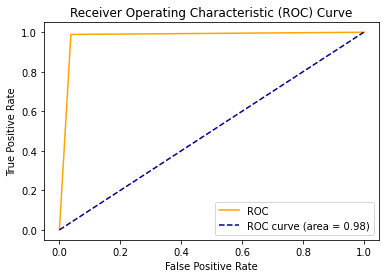

In [37]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [42]:
# How to verify thersold values ? when we give model predict_probality we will get two index 0,1 - Becase we have
# Two labels - Thats what we are getting two probabality value for each data point.
# Now take index 1 as my predict score
y_proba= model.predict_proba(X_test)
y_proba

array([[3.21843835e-03, 9.96781562e-01],
       [8.73559044e-05, 9.99912644e-01],
       [9.81149105e-01, 1.88508948e-02],
       [2.41933388e-02, 9.75806661e-01],
       [2.08489493e-03, 9.97915105e-01],
       [1.10687536e-03, 9.98893125e-01],
       [8.34136215e-03, 9.91658638e-01],
       [1.67503958e-02, 9.83249604e-01],
       [2.29552761e-01, 7.70447239e-01],
       [6.75828774e-04, 9.99324171e-01],
       [4.52463037e-03, 9.95475370e-01],
       [8.61191265e-05, 9.99913881e-01],
       [2.36501446e-04, 9.99763499e-01],
       [3.04395876e-01, 6.95604124e-01],
       [2.54914512e-03, 9.97450855e-01],
       [1.37219045e-01, 8.62780955e-01],
       [8.48618046e-04, 9.99151382e-01],
       [9.99999998e-01, 2.33348457e-09],
       [1.00000000e+00, 2.35832754e-13],
       [9.99999970e-01, 3.01454693e-08],
       [2.71540251e-03, 9.97284597e-01],
       [1.55428899e-05, 9.99984457e-01],
       [4.71953179e-04, 9.99528047e-01],
       [9.99495971e-04, 9.99000504e-01],
       [2.427848

In [44]:
#Assume index 1 has all correct prediction & take this out
y_predict = y_proba[:,1]
y_predict

array([9.96781562e-01, 9.99912644e-01, 1.88508948e-02, 9.75806661e-01,
       9.97915105e-01, 9.98893125e-01, 9.91658638e-01, 9.83249604e-01,
       7.70447239e-01, 9.99324171e-01, 9.95475370e-01, 9.99913881e-01,
       9.99763499e-01, 6.95604124e-01, 9.97450855e-01, 8.62780955e-01,
       9.99151382e-01, 2.33348457e-09, 2.35832754e-13, 3.01454693e-08,
       9.97284597e-01, 9.99984457e-01, 9.99528047e-01, 9.99000504e-01,
       9.75721511e-01, 9.06663854e-01, 2.65680636e-07, 9.99107376e-01,
       9.99779632e-01, 3.07699552e-03, 9.97308573e-01, 9.79560431e-01,
       5.09739824e-21, 7.15124066e-01, 8.41305852e-01, 9.97979467e-01,
       9.67326305e-01, 9.99265795e-01, 9.98389498e-01, 9.96331961e-01,
       9.96238937e-01, 3.85935548e-05, 5.85439757e-13, 9.87179215e-01,
       9.98281144e-01, 9.99746558e-01, 8.34528749e-01, 4.17163021e-03,
       9.80011926e-01, 5.78470952e-04, 9.59714820e-01, 1.77004538e-02,
       9.99446413e-01, 9.99747096e-01, 9.62100790e-01, 6.18564470e-02,
      

In [45]:
# Now provide the input 
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

In [46]:
fpr

array([0.        , 0.        , 0.        , 0.01886792, 0.01886792,
       0.03773585, 0.03773585, 0.0754717 , 0.0754717 , 1.        ])

In [47]:
tpr

array([0.        , 0.01111111, 0.85555556, 0.85555556, 0.95555556,
       0.95555556, 0.98888889, 0.98888889, 1.        , 1.        ])

In [48]:
# From large to small value selecting randomly
# Internally 10 maximum
# If we select 0.5(5.03e-01) Thersold we will get 0.988 TPR rate(above Corresponding index inn tpr),0.0377
# This will help domain expertice which thersold should choose
# Whether we need increase True postive or False postive.
# If I choose 0.6 - Model will overfit - Becasue 100% accuracy.
thresholds

array([1.99998446e+00, 9.99984457e-01, 9.21415141e-01, 9.13834629e-01,
       7.30913890e-01, 7.15124066e-01, 5.03890660e-01, 6.89264152e-02,
       6.20891732e-02, 2.32493792e-35])

In [49]:
# Area Under Curve
auc = roc_auc_score(y_test, y_predict)
auc

0.9960167714884696

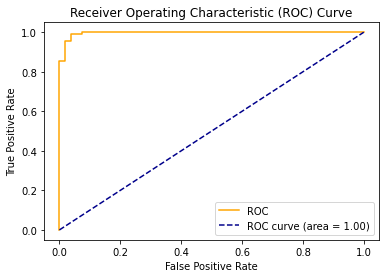

In [50]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [38]:
# Different different probability we are applying and we are calcualting TP & FP rate.
# Here we can see arouund 98% Curve we are getting good accuracy.

# Difference between Grid Search & Random search

## Assigment

In [ ]:
# Take multiclass problem  & How to apply One Vs other Technique

##  Interview question

Can we apply for below case Logistic regression?


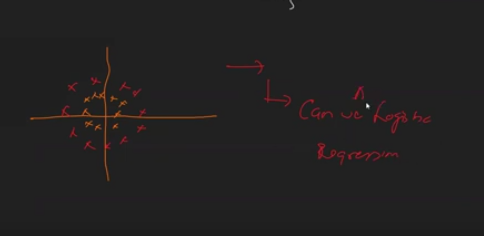

In [ ]:
Yes we can do. Using square the X value & we will get plane as below.

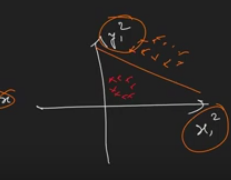

## Random Search

In [2]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7897619047619049
Best Hyperparameters: {'C': 4.878363034905756, 'penalty': 'l2', 'solver': 'newton-cg'}
